<a href="https://colab.research.google.com/github/KiranTanwani/Machine-Learning/blob/main/MovieLens_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 2.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619415 sha256=9ec7d59b71ef6a6b12fbf385f07732d297b8df8c758c2c5c0f7423c23bc6f31c
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd /content/drive/"My Drive/Colab Notebooks/AI Assignment"

/content/drive/My Drive/Colab Notebooks/AI Assignment


In [6]:

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [7]:
with open('u.data') as f:
    all_lines = f.readlines()

In [8]:
all_lines

['196\t242\t3\t881250949\n',
 '186\t302\t3\t891717742\n',
 '22\t377\t1\t878887116\n',
 '244\t51\t2\t880606923\n',
 '166\t346\t1\t886397596\n',
 '298\t474\t4\t884182806\n',
 '115\t265\t2\t881171488\n',
 '253\t465\t5\t891628467\n',
 '305\t451\t3\t886324817\n',
 '6\t86\t3\t883603013\n',
 '62\t257\t2\t879372434\n',
 '286\t1014\t5\t879781125\n',
 '200\t222\t5\t876042340\n',
 '210\t40\t3\t891035994\n',
 '224\t29\t3\t888104457\n',
 '303\t785\t3\t879485318\n',
 '122\t387\t5\t879270459\n',
 '194\t274\t2\t879539794\n',
 '291\t1042\t4\t874834944\n',
 '234\t1184\t2\t892079237\n',
 '119\t392\t4\t886176814\n',
 '167\t486\t4\t892738452\n',
 '299\t144\t4\t877881320\n',
 '291\t118\t2\t874833878\n',
 '308\t1\t4\t887736532\n',
 '95\t546\t2\t879196566\n',
 '38\t95\t5\t892430094\n',
 '102\t768\t2\t883748450\n',
 '63\t277\t4\t875747401\n',
 '160\t234\t5\t876861185\n',
 '50\t246\t3\t877052329\n',
 '301\t98\t4\t882075827\n',
 '225\t193\t4\t879539727\n',
 '290\t88\t4\t880731963\n',
 '97\t194\t3\t884238860\n',


In [9]:
# Define the format
reader = Reader(line_format='user item rating timestamp', sep='\t')
# Load the data from the file using the reader format
data = Dataset.load_from_file('u.data', reader=reader)

In [11]:
print(data)

In [25]:
!pip install memory_profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-py3-none-any.whl size=30190 sha256=c54c7e93895eaed52c2a454685450a2ebe0d9d5ef7d5d67c4e6c4ac268f2ca4f
  Stored in directory: /root/.cache/pip/wheels/56/19/d5/8cad06661aec65a04a0d6785b1a5ad035cb645b1772a4a0882
Successfully built memory-profiler


In [26]:
%load_ext memory_profiler

In [12]:
algo_movie_svd = SVD()

In [27]:
%memit cross_validate(algo_movie_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True) #Find RMSE ,MSE,Fit time 

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9374  0.9352  0.9345  0.9360  0.9366  0.9359  0.0010  
MAE (testset)     0.7391  0.7382  0.7373  0.7362  0.7370  0.7376  0.0010  
Fit time          5.00    4.81    4.94    4.88    4.87    4.90    0.06    
Test time         0.16    0.29    0.16    0.25    0.25    0.22    0.05    
peak memory: 254.80 MiB, increment: 2.45 MiB


In [37]:
rsme_svd = 0.9359
mae_svd = 0.7376
fittime_svd = 4.90
memory_svd=254.80
svd_lst = [rsme_svd,mae_svd,fittime_svd]

In [28]:
from surprise import KNNBasic

# Build an algorithm, and train it.
algo_movie_knn = KNNBasic()
%memit cross_validate(algo_movie_knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True) #Find RMSE ,MSE,Fit time


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9762  0.9844  0.9828  0.9754  0.9771  0.9792  0.0037  
MAE (testset)     0.7717  0.7741  0.7788  0.7704  0.7720  0.7734  0.0029  
Fit time          0.43    0.45    0.44    0.43    0.45    0.44    0.01    
Test time         4.05    4.04    3.99    4.00    4.19    4.05    0.07    
peak memory: 268.58 MiB, increment: 17.22 MiB


In [38]:
rsme_knn = 0.9792
mae_knn = 0.7734
fittime_knn = 0.44
memory_knn =268.58
knn_lst=[rsme_knn,mae_knn,fittime_knn]

In [29]:
from surprise import NMF

# Build an algorithm, and train it.
algo_movie_nmf = NMF()
%memit cross_validate(algo_movie_nmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True) #Find RMSE ,MSE,Fit time


Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9635  0.9696  0.9530  0.9669  0.9616  0.9629  0.0057  
MAE (testset)     0.7573  0.7584  0.7488  0.7647  0.7553  0.7569  0.0051  
Fit time          5.76    5.73    5.84    5.78    5.80    5.78    0.04    
Test time         0.16    0.28    0.19    0.14    0.25    0.20    0.05    
peak memory: 268.54 MiB, increment: 0.33 MiB


In [39]:
rsme_nmf = 0.9629
mae_nmf = 0.7569
fittime_nmf = 5.78
memory_nmf =268.54
nmf_lst = [rsme_nmf,mae_nmf,fittime_nmf]

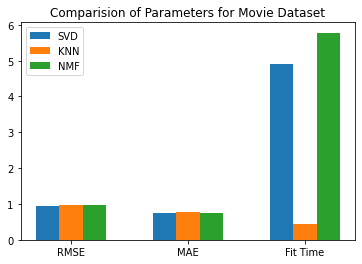

In [40]:
W = ['RMSE','MAE','Fit Time']
X = svd_lst;
Y = knn_lst;
Z = nmf_lst;
X_axis = np.arange(len(W))
plt.bar(X_axis - 0.2, X, 0.2, label = 'SVD')
plt.bar(X_axis, Y, 0.2, label = 'KNN')
plt.bar(X_axis + 0.2, Z, 0.2, label = 'NMF')
    
plt.xticks(X_axis, W)
plt.title("Comparision of Parameters for Movie Dataset")
plt.legend()
plt.show()

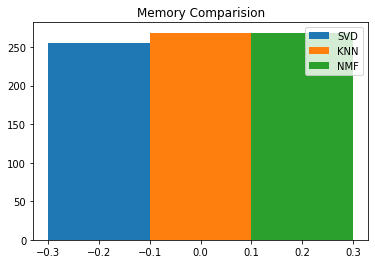

In [44]:
memory = [memory_svd]
plt.bar(np.arange(len(memory))-0.2,memory_svd,0.2,label='SVD')
plt.bar(np.arange(len(memory)), memory_knn, 0.2, label = 'KNN')
plt.bar(np.arange(len(memory)) + 0.2, memory_nmf, 0.2, label = 'NMF')

plt.title("Memory Comparision")
plt.legend()
plt.show()